In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
import numpy as np

2024-12-05 16:23:50.693018: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733390630.714837    8069 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733390630.720963    8069 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 16:23:50.743762: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Define dataset paths
dataset_path = "./dataset"

In [3]:
# Parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 100

In [4]:
# Data generators for training, validation, and testing data
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # Split 20% of data for validation
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True  # Shuffle the training data
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False  # Do not shuffle the validation data
)

Found 33435 images belonging to 2 classes.
Found 8358 images belonging to 2 classes.


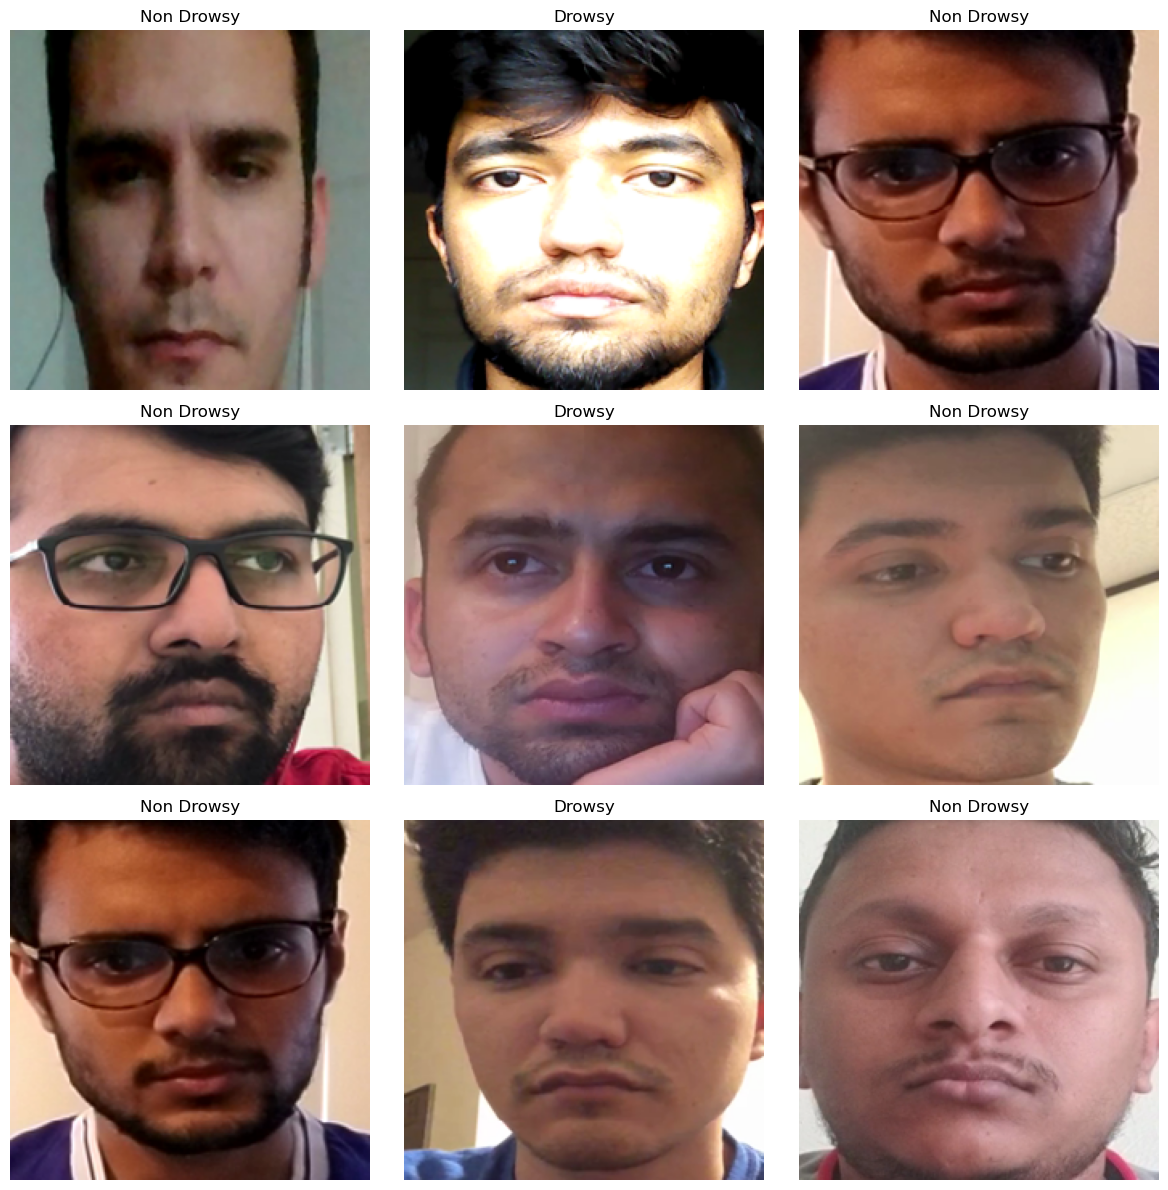

In [5]:
# Display some images from the dataset
sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title("Drowsy" if sample_labels[i] == 0 else "Non Drowsy")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Build a new model from scratch
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/home/tyson/development/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733390637.642278    8069 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6717 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1


In [7]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

# Print training and validation loss and accuracy
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print(f"Final Training Loss: {train_loss[-1]:.4f}")
print(f"Final Training Accuracy: {train_accuracy[-1]:.4f}")
print(f"Final Validation Loss: {val_loss[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracy[-1]:.4f}")


Epoch 1/100


/home/tyson/development/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733390640.354137    8287 service.cc:148] XLA service 0x7f42dc005000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733390640.354236    8287 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2024-12-05 16:24:00.410629: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733390640.649677    8287 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-05 16:24:01.494087: I 

   2/1045 ━━━━━━━━━━━━━━━━━━━━ 59s 57ms/step - accuracy: 0.5547 - loss: 0.9929  

I0000 00:00:1733390645.742075    8287 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1031/1045 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9274 - loss: 0.1637

2024-12-05 16:25:37.047633: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[27,32,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[27,3,224,224]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-12-05 16:25:37.132057: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[27,64,109,109]{3,2,1,0}, u8[0]{0}) custom-call(f32[27,32,111,111]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"

1045/1045 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9280 - loss: 0.1623

2024-12-05 16:25:42.836401: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[32,32,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,224,224]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-12-05 16:25:42.937254: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[32,64,109,109]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,111,111]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"

1045/1045 ━━━━━━━━━━━━━━━━━━━━ 126s 114ms/step - accuracy: 0.9281 - loss: 0.1622 - val_accuracy: 0.5812 - val_loss: 2.0853
Epoch 2/100
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 112s 107ms/step - accuracy: 0.9959 - loss: 0.0163 - val_accuracy: 0.6977 - val_loss: 1.4567
Epoch 3/100
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 111s 106ms/step - accuracy: 0.9978 - loss: 0.0080 - val_accuracy: 0.6905 - val_loss: 2.5511
Epoch 4/100
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 112s 107ms/step - accuracy: 0.9977 - loss: 0.0108 - val_accuracy: 0.6815 - val_loss: 2.7243
Epoch 5/100
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 112s 107ms/step - accuracy: 0.9991 - loss: 0.0035 - val_accuracy: 0.7686 - val_loss: 1.4881
Epoch 6/100
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 111s 106ms/step - accuracy: 0.9990 - loss: 0.0043 - val_accuracy: 0.7807 - val_loss: 1.7452
Epoch 7/100
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 110s 105ms/step - accuracy: 0.9976 - loss: 0.0112 - val_accuracy: 0.7950 - val_loss: 1.3513
Epoch 8/100
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 113s 108ms/step - accura